In [ ]:
#Importacion de librerias

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import pingouin as pg
import numpy as np
import warnings
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf


from scipy.stats import norm
from scipy.stats import f
from statsmodels.stats.stattools import durbin_watson
from statsmodels.formula.api import mixedlm
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from tabulate import tabulate


# sys.setrecursionlimit(1500)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 12)

Data = pd.read_csv("Muestra.csv")


## <b> Asignacion de Valor</b>

<p style="text-align: justify;"> El objetivo primordial de la caracterización de un candidato a MR, es determinar el valor de la(s) propiedad(es) a certificar. El valor de caracterización debe ser evaluado cuidadosamente para tomar en cuenta todas las posibles fuentes de incertidumbre para definir el valor certificado de la propiedad. El modelo básico para la asignación del valor certificado se expresa como se indica en la Ecuación: </p>

$$y_{mrc} = x_{car} + δx_{bb} + δx_{lts} + δx_{sts}$$
<br>

Donde :

$y_{mrc}$ = Valor asignado de la propiedad

$x_{car}$ = Valor de la propiedad obtenido de la caracterización

$δx_{bb}$ = Error debido a las variaciones entre unidades del lote (pruebas de homogeneidad)

$δx_{lts}$  y $δx_{sts}$ = Errores debidos a la inestabilidad del MR a largo plazo y corto plazo
<br>




<p style="text-align: justify;"> Generalmente un candidato a MRC se aprueba para certificación si la homogeneidad del lote y la inestabilidad no contribuyen significativamente al valor de la propiedad, en ese caso los términos de error correspondientes pueden considerarse nulos de tal forma que el valor de caracterización representa el valor asignado de la propiedad a certificar.

<p style="text-align: justify;"> El análisis estadístico de los materiales de control de calidad es un componente esencial en la garantía de la precisión y fiabilidad de los procesos de medición en diversas industrias. En este contexto, la correcta asignación del valor de un material de referencia, así como la evaluación de su incertidumbre, son fundamentales para asegurar que las mediciones se mantengan dentro de los límites establecidos de calidad.

<p style="text-align: justify;">La norma ISO 13528:2015, titulada Análisis estadístico de los datos de control de calidad en la evaluación de materiales de referencia, establece los procedimientos para el análisis y la evaluación de materiales de referencia, con el fin de obtener estimaciones precisas y fiables del valor verdadero de dichos materiales. Entre los métodos destacados en esta norma se encuentran el uso de la media robusta y la desviación estándar robusta, los cuales permiten manejar datos atípicos y obtener estimaciones menos sensibles a los valores extremos en los conjuntos de datos.

<p style="text-align: justify;">Una vez obtenida la media robusta y la desviación estándar robusta, se puede construir un intervalo de confianza para el valor verdadero del material. El intervalo de confianza del 95%, que se define como el valor de la media robusta ± 1.96 veces la desviación estándar robusta, es comúnmente utilizado para describir el rango en el que se espera que se encuentre el valor verdadero con un alto grado de certeza.

## <b>Caracterizacion de la muestra</b><br>

<p style="text-align: justify;"> La caracterización de la muestra es el proceso de medición de las propiedades a certificar utilizando un conjunto de muestras de referencia. Este proceso puede ser realizado con diferentes técnicas, como el método de la calibración, el método de la proporción, el método de la proporción de calibración, etc. La caracterización se realiza mediante dos tecnicas o metodos de analisis, como medida de trazabilidad se utiliza un MRC como medida de control. Los resultados obtenidos quedaran plasmados en el anexo de este documento. <br>

El resumen descriptivo de los datos obtenidos son los siguientes:

In [58]:
print("==============================================================================")
print (Data.describe())
print("==============================================================================")

          Cu (%)     Fe (%)     Zn (%)     As (%)      Mo (%)     Pb (%)  \
count  30.000000  90.000000  90.000000  90.000000  190.000000  90.000000   
mean    0.974967   1.700100   0.036333   0.027778    0.054189   0.006144   
std     0.005611   0.078422   0.002553   0.001993    0.005337   0.003221   
min     0.961000   1.607000   0.029000   0.025000    0.044000   0.000000   
25%     0.972000   1.640250   0.035250   0.026000    0.051000   0.004000   
50%     0.974000   1.661500   0.037000   0.027000    0.053000   0.005000   
75%     0.978750   1.794000   0.038000   0.029000    0.055000   0.010000   
max     0.985000   1.838000   0.041000   0.034000    0.072000   0.010000   

        Ag (g/t)  
count  90.000000  
mean    5.550500  
std     1.077356  
min     3.690000  
25%     4.700000  
50%     5.500000  
75%     6.300000  
max     8.180000  


\newpage

## <b> Determinacion de Datos Atipicos </b><br> <br>
<p style ="text-align:justify;">
<b>El Test de Tukey</b> (también conocido como Test de Tukey para valores atípicos o Test de Tukey basado en el rango intercuartílico) es un método simple y robusto para identificar valores atípicos (outliers) en un conjunto de datos, usando el rango intercuartílico (IQR, por sus siglas en inglés). Se basa en el análisis de los cuartiles de los datos para detectar valores que se encuentran fuera de un rango aceptable. El rango intercuartílico es una medida de dispersión de un conjunto de datos que expresa la diferencia o la distancia entre el primer y el tercer cuartil. El rango intercuartil está considerado un estadístico robusto por su baja exposición a valores extremos. Esto es debido a que solo se consideran las observaciones entre el tercer cuartil y el primer cuartil. Todas las observaciones fuera de ese rango quedan excluidas del cálculo y, por tanto, solo se tienen en cuenta las observaciones más cercanas a la mediana, es decir, al segundo cuartil.
</br>

$$ IQR = Q3 - Q1  \\  LI/LS = Q1 ± 1.5 * IQR $$


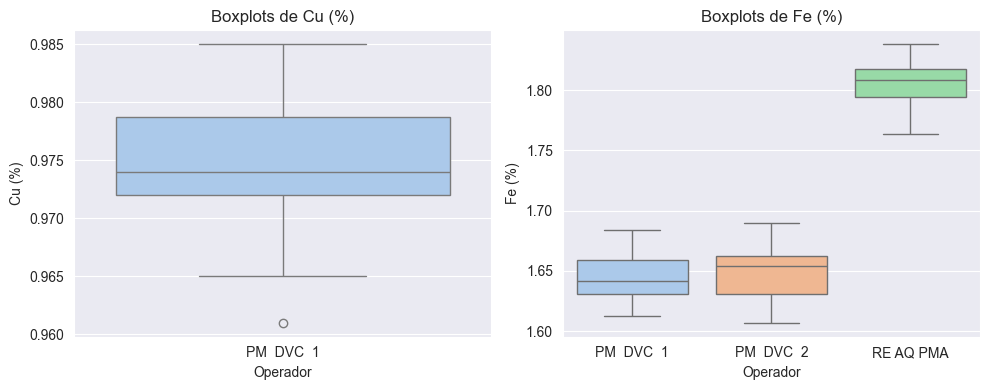

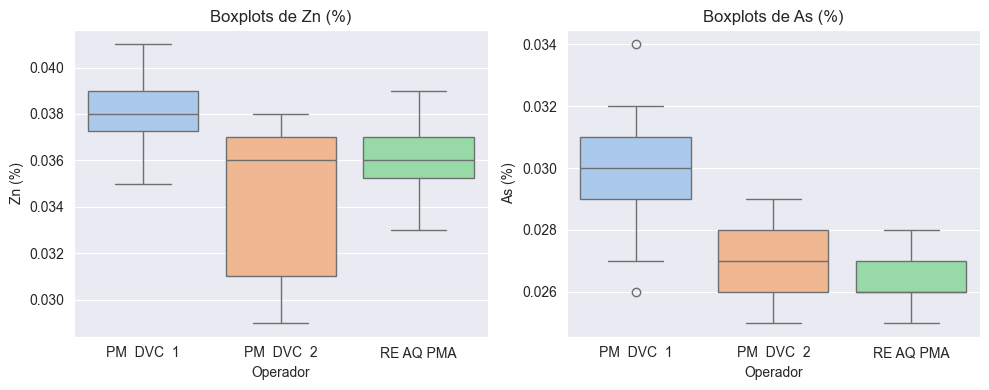

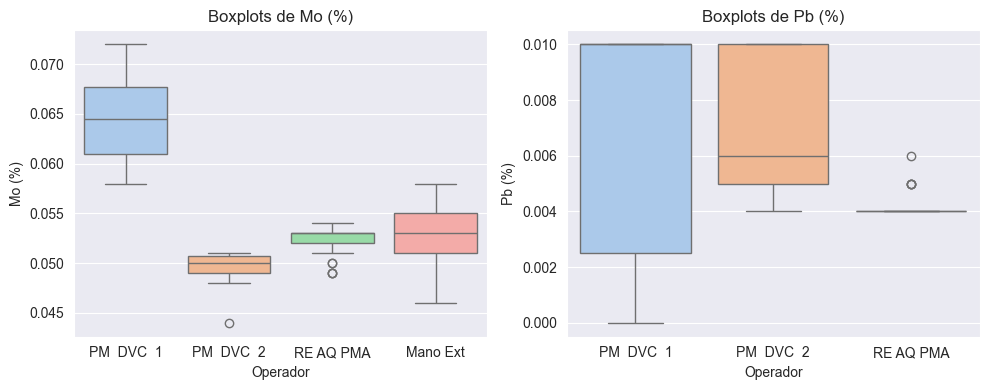

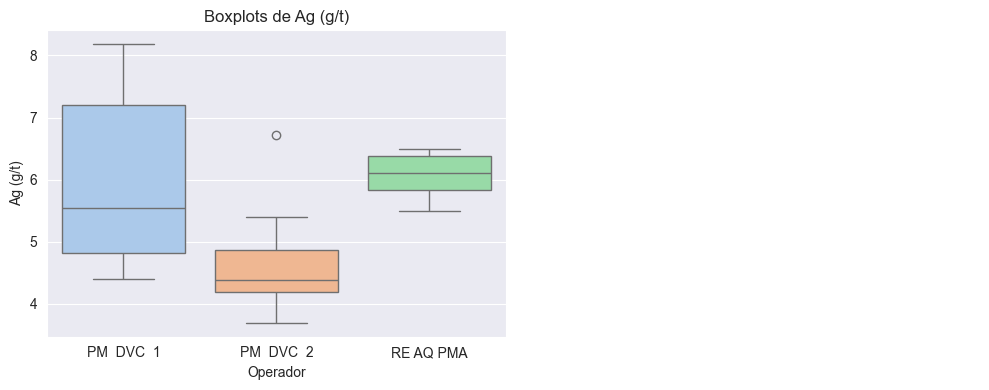

In [59]:
Elementos = ["Cu (%)","Fe (%)","Zn (%)","As (%)","Mo (%)","Pb (%)","Ag (g/t)"]


ncols = 2
count = 0

while count < len(Elementos):
    fig, axes = plt.subplots(1, ncols, figsize=(10, 4))
    axes = np.array(axes).flatten()

    for i in range(ncols):
        idx = count + i

        if idx >= len(Elementos):
            axes[i].axis('off')
            continue

        ax = axes[i]
        elemento = Elementos[idx]
        data_clean = Data[["Operador",elemento]].dropna()
        sns.boxplot(data=data_clean, x="Operador", y=elemento, ax=ax, palette="pastel")
        ax.set_title(f"Boxplots de {elemento}")

    count += ncols
    plt.tight_layout()
    plt.show()


In [60]:
# Diccionario para almacenar los resultados de outliers
outlier_results = {}

print("=====================================================================")
for elemento in Elementos:
    Q1 = Data[elemento].quantile(0.25)  # Primer cuartil
    Q3 = Data[elemento].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    std_dev = Data[elemento].std()  # Desviación estándar del elemento

    min_val = Data[elemento].min()
    max_val = Data[elemento].max()

    # Estrategia adaptativa basada en el IQR y la desviación estándar
    if IQR < 0.001 or max_val - min_val < 0.01:  # Datos muy cercanos
        print(f"Para {elemento}, datos muy cercanos (IQR = {IQR:.4f}, std_dev = {std_dev:.4f})")
        lower_bound = min_val - 0.01  # Establecer límites más amplios
        upper_bound = max_val + 0.01
    else:
        print(f"{elemento}: Límite inferior = {Q1 - 1.5 * IQR:.4f}, Límite superior = {Q3 + 1.5 * IQR:.4f}")
        lower_bound = Q1 - 1.5 * IQR  # Límite estándar para datos dispersos
        upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    outliers = Data[(Data[elemento] < lower_bound) | (Data[elemento] > upper_bound)]
    if outliers.empty:
        print(f"No se detectaron outliers para {elemento}.")
    else:
        print(f"Outliers detectados para {elemento}.")
    outlier_results[elemento] = outliers[['Operador', elemento]]

# Concatenar los resultados de outliers para todos los elementos
outlier_df = pd.concat(outlier_results, axis=1)  # Concatenar horizontalmente

print("====================================================================")
print("Resultados de outliers para cada elemento:")
print("================================================================================")
print(outlier_df[["Cu (%)","Fe (%)","Zn (%)","As (%)","Mo (%)","Pb (%)","Ag (g/t)"]].to_string(index=False))  # Mostrar sin índice


Cu (%): Límite inferior = 0.9619, Límite superior = 0.9889
Outliers detectados para Cu (%).
Fe (%): Límite inferior = 1.4096, Límite superior = 2.0246
No se detectaron outliers para Fe (%).
Zn (%): Límite inferior = 0.0311, Límite superior = 0.0421
Outliers detectados para Zn (%).
Para As (%), datos muy cercanos (IQR = 0.0030, std_dev = 0.0020)
No se detectaron outliers para As (%).
Mo (%): Límite inferior = 0.0450, Límite superior = 0.0610
Outliers detectados para Mo (%).
Pb (%): Límite inferior = -0.0050, Límite superior = 0.0190
No se detectaron outliers para Pb (%).
Ag (g/t): Límite inferior = 2.3000, Límite superior = 8.7000
No se detectaron outliers para Ag (g/t).
Resultados de outliers para cada elemento:
    Cu (%)          Fe (%)            Zn (%)          As (%)            Mo (%)          Pb (%)        Ag (g/t)         
  Operador Cu (%) Operador Fe (%)   Operador Zn (%) Operador As (%)   Operador Mo (%) Operador Pb (%) Operador Ag (g/t)
PM  DVC  1  0.961      NaN    NaN     

In [61]:
# Inicializar Dataso con el DataFrame original
Dataso = Data.copy()

# Iterar sobre cada elemento para calcular los límites y reemplazar outliers con NaN
for elemento in Elementos:
    if elemento in Data.columns:  # Validar que el elemento exista en el DataFrame
        # Calcular Q1, Q3, IQR y desviación estándar
        Q1 = Data[elemento].quantile(0.25)
        Q3 = Data[elemento].quantile(0.75)
        IQR = Q3 - Q1
        std_dev = Data[elemento].std()
        min_val = Data[elemento].min()
        max_val = Data[elemento].max()

        # Aplicar una lógica adaptativa para definir límites de outliers
        if IQR < 0.001 or max_val - min_val < 0.01:
            # Si los valores son muy cercanos, no eliminar valores (o aplicar límites muy amplios)
            print(f"Para {elemento}, los datos son muy cercanos (IQR = {IQR:.4f}, std_dev = {std_dev:.4f})")
            lower_bound = min_val - 0.01  # Límites amplios para no eliminar valores cercanos
            upper_bound = max_val + 0.01
        else:
            # Definir límites estándar si los datos tienen suficiente dispersión
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

        # Reemplazar outliers con NaN en Dataso solo si exceden los límites
        Dataso[elemento] = np.where(
            (Dataso[elemento] < lower_bound) | (Dataso[elemento] > upper_bound),
            np.nan,
            Dataso[elemento]
        )
    else:
        print(f"Advertencia: {elemento} no se encuentra en los datos.")

# Guardar el DataFrame sin outliers en un archivo CSV
Dataso.to_csv("Dataso.csv", index=False)  # Guardar sin incluir el índice

print("==============================================================================")
print("Datos sin Outliers:")
print(Dataso.describe())  # Mostrar estadísticas descriptivas de los datos
print("==============================================================================")


Para As (%), los datos son muy cercanos (IQR = 0.0030, std_dev = 0.0020)
Datos sin Outliers:
          Cu (%)     Fe (%)     Zn (%)     As (%)      Mo (%)     Pb (%)  \
count  29.000000  90.000000  81.000000  90.000000  169.000000  90.000000   
mean    0.975448   1.700100   0.037000   0.027778    0.052746   0.006144   
std     0.005040   0.078422   0.001643   0.001993    0.003053   0.003221   
min     0.965000   1.607000   0.032000   0.025000    0.046000   0.000000   
25%     0.972000   1.640250   0.036000   0.026000    0.051000   0.004000   
50%     0.974000   1.661500   0.037000   0.027000    0.053000   0.005000   
75%     0.979000   1.794000   0.038000   0.029000    0.054000   0.010000   
max     0.985000   1.838000   0.041000   0.034000    0.061000   0.010000   

        Ag (g/t)  
count  90.000000  
mean    5.550500  
std     1.077356  
min     3.690000  
25%     4.700000  
50%     5.500000  
75%     6.300000  
max     8.180000  


## <b> Calculos de los limites de Confianza </b>

Un intervalo de confianza es el rango dentro del cual se espera que se encuentre el valor verdadero de una cantidad, con un nivel de confianza especificado (por ejemplo, 95%), calculado a partir de un estimador robusto de tendencia central (como la media robusta) y un estimador robusto de dispersión (como la desviación estándar robusta).

En términos generales, el intervalo de confianza robusto se expresa como:

$$
\text{Límites de confianza} = \overline{x}_{\text{rob}} \pm 1.96 \times \sigma_{\text{rob}}
$$

Donde: <br>

$\overline{x}_{\text{rob}} =$ Media Robusta <br></br>

$\sigma_{\text{rob}} =$ Desviacion Estandar Robusta  <br></br>



​
  es el valor de la distribución normal estándar correspondiente al nivel de confianza deseado.





In [62]:
for elemento in Elementos:
    if elemento in Data.columns:
        MedRob = Dataso[elemento].mean()
        DesRob = Dataso[elemento].std()
        
        print(f"Intervalo de Confianza para {elemento}:")
        print(f"{MedRob.round(3)} ± 1.96 × {DesRob.round(3)}")
        print("=============================================================")


Intervalo de Confianza para Cu (%):
0.975 ± 1.96 × 0.005
Intervalo de Confianza para Fe (%):
1.7 ± 1.96 × 0.078
Intervalo de Confianza para Zn (%):
0.037 ± 1.96 × 0.002
Intervalo de Confianza para As (%):
0.028 ± 1.96 × 0.002
Intervalo de Confianza para Mo (%):
0.053 ± 1.96 × 0.003
Intervalo de Confianza para Pb (%):
0.006 ± 1.96 × 0.003
Intervalo de Confianza para Ag (g/t):
5.55 ± 1.96 × 1.077


\newpage

## <b> Grafica de Histograma </b>
<p style="text-align: justify;">
Usar un gráfico de histograma es fundamental para visualizar la distribución de un conjunto de datos cuantitativos, ya que permite observar la frecuencia de diferentes rangos de valores. Este tipo de gráfico ayuda a identificar patrones, como la forma de la distribución (normal, sesgada,bimodal, etc.), así como la presencia de valores atípicos y la dispersión de los datos. Además, los histogramas son herramientas efectivas pararesumir grandes volúmenes de información y facilitar la comparación entre diferentes conjuntos de datos, lo que es esencial en el análisisexploratorio y en la toma de decisiones informadas. </p>

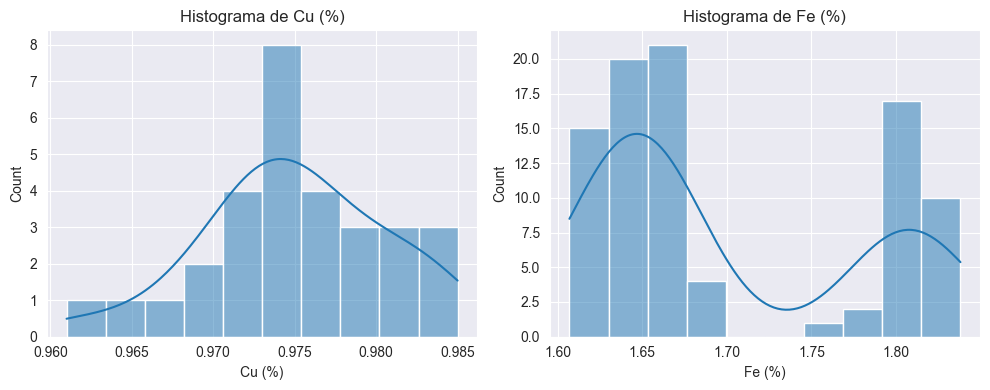

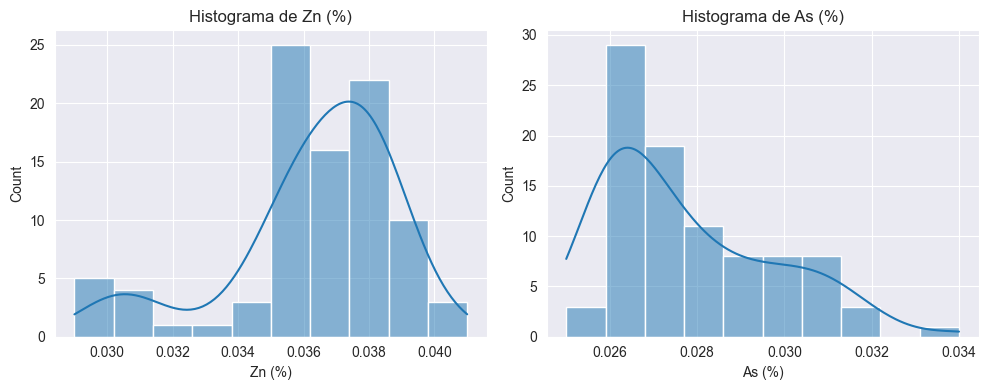

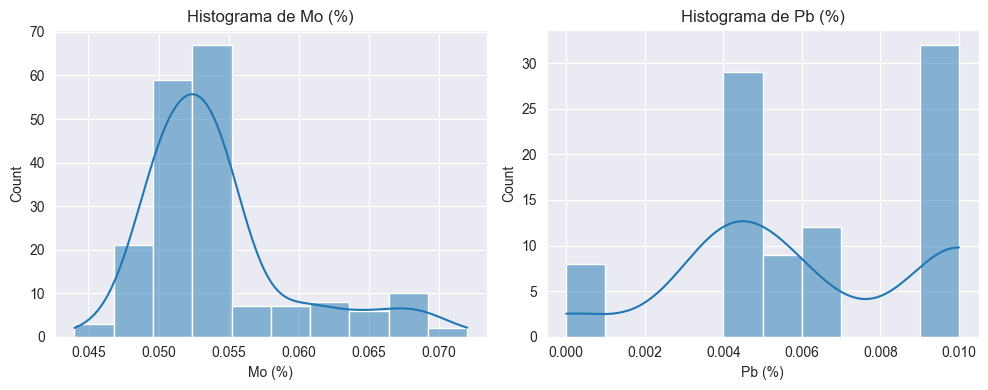

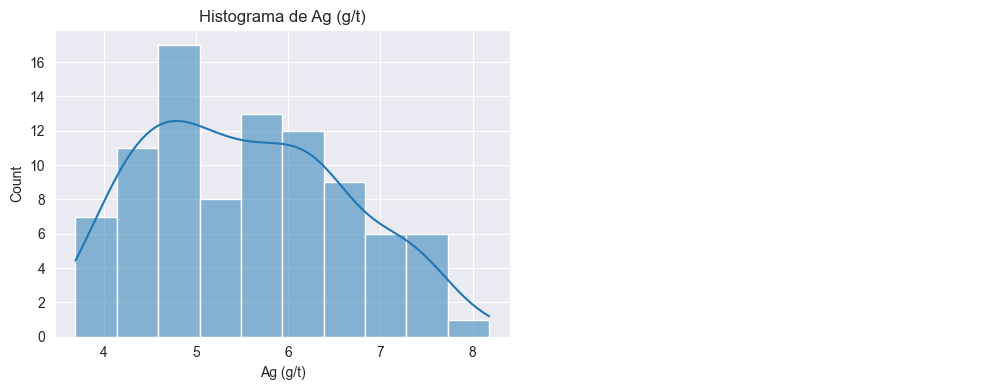

In [63]:
ncols = 2
count = 0

while count < len(Elementos):
    fig, axes = plt.subplots(1, ncols, figsize=(10, 4))
    axes = np.array(axes).flatten()

    for i in range(ncols):
        idx = count + i

        if idx >= len(Elementos):
            axes[i].axis('off')
            continue

        ax = axes[i]
        elemento = Elementos[idx]
        data_clean = Data[[elemento]].dropna()

        sns.histplot(data=data_clean, x=elemento, kde=True, ax=ax, bins=10)
        ax.set_title(f"Histograma de {elemento}")

    count += ncols
    plt.tight_layout()
    plt.show()


\newpage

## <b> Grafica de Cuantiles </b>
<p style="text-align: justify;">
Usar un gráfico de cuantiles, o gráfico Q-Q, es útil para evaluar si un conjunto de datos sigue una distribución específica, como la normal. Alcomparar los cuantiles de los datos con los cuantiles de la distribución teórica, podemos visualizar la adherencia a la normalidad: si los puntos sealinean en una línea recta, indica que los datos son aproximadamente normales. Además, este gráfico ayuda a identificar valores atípicos y aobservar la simetría o asimetría de la distribución, lo que es fundamental en el análisis estadístico y en la validación de supuestos para pruebasparamétricas.

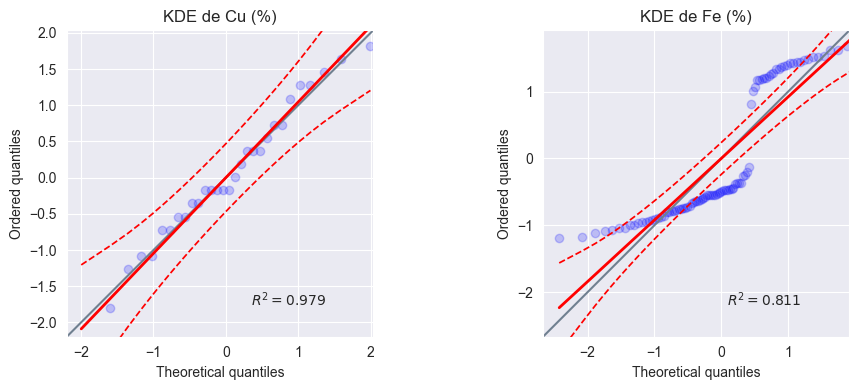

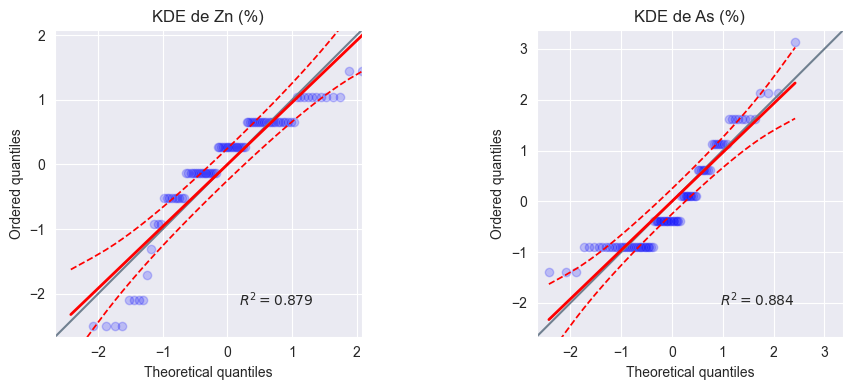

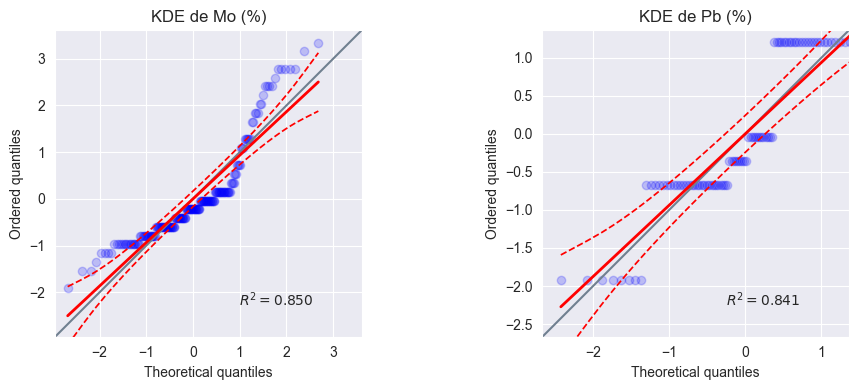

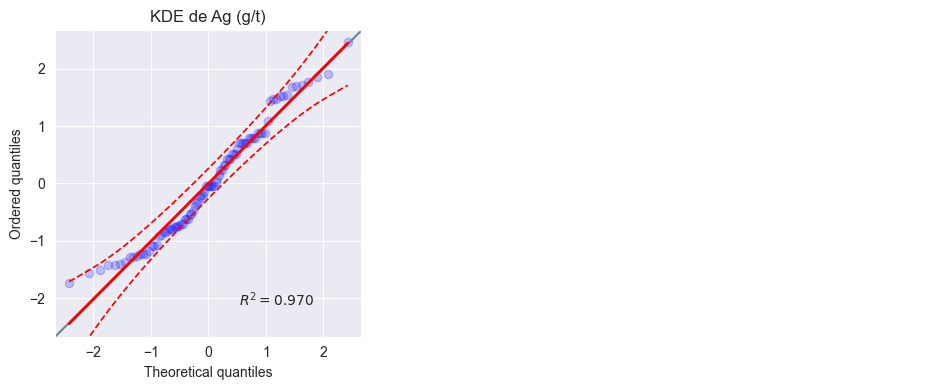

In [64]:
ncols = 2
count = 0

while count < len(Elementos):
    fig, axes = plt.subplots(1, ncols, figsize=(10, 4))
    axes = np.array(axes).flatten()

    for i in range(ncols):
        idx = count + i

        if idx >= len(Elementos):
            axes[i].axis('off')
            continue

        ax = axes[i]
        elemento = Elementos[idx]
        data_clean = Data[["Operador",elemento]].dropna()

        pg.qqplot(data_clean[elemento], ax=ax, alpha=0.2)
        ax.set_title(f"KDE de {elemento}")

    count += ncols
    plt.tight_layout()
    plt.show()

\newpage

## <b> Grafica KDE </b>
<p style="text-align: justify;">
La gráfica KDE (Kernel Density Estimation) es una visualización que muestra la distribución de una variable continua, suavizando los valores para obtener una curva de densidad más clara que un histograma. A diferencia de los histogramas, que agrupan los datos en intervalos, la gráfica KDE utiliza una función de núcleo para estimar la probabilidad de observar un valor en una determinada región del espacio de datos. Esto permite identificar patrones como la tendencia central y la dispersión, así como la presencia de múltiples picos o colas en los datos, proporcionando una representación más suave y continua de la distribución.

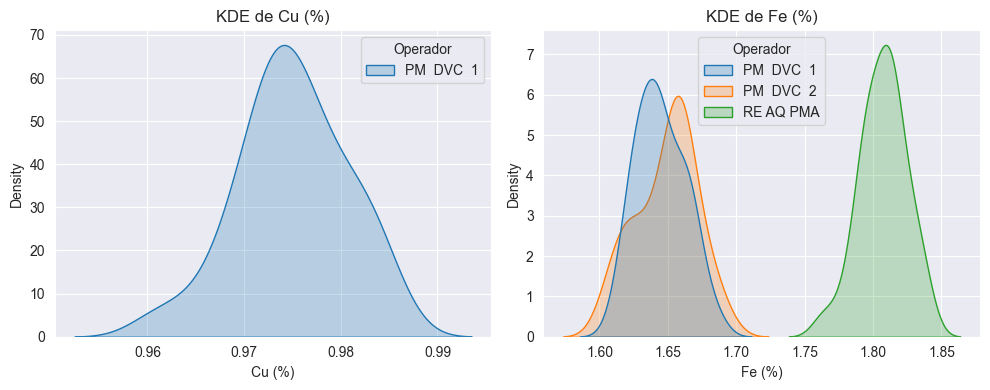

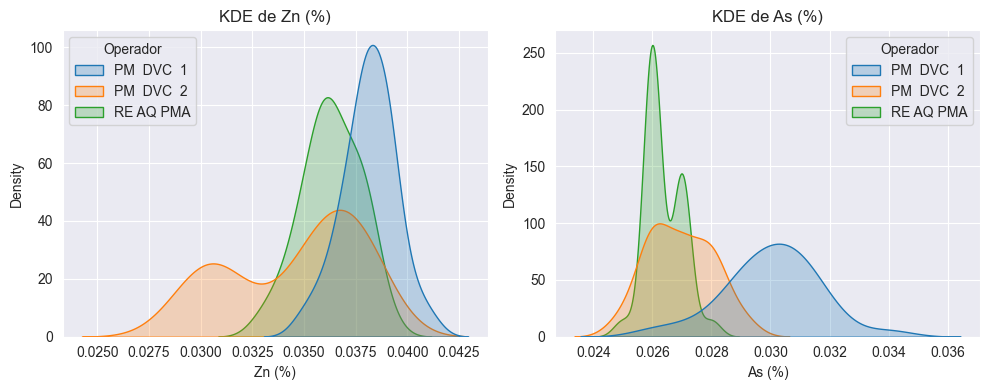

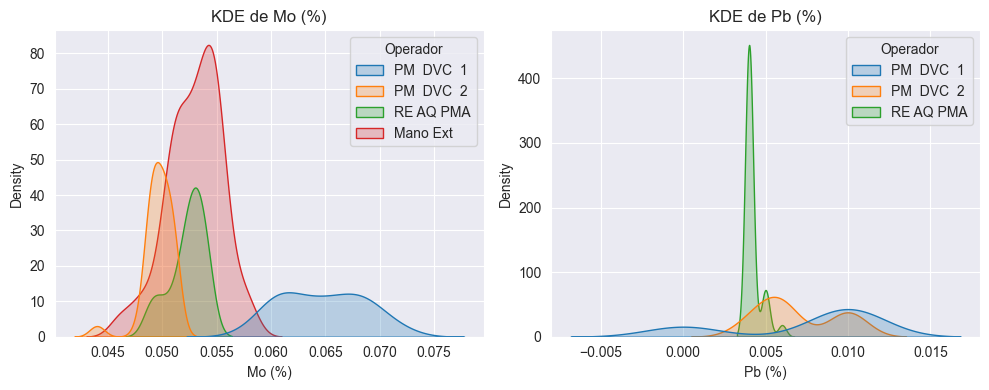

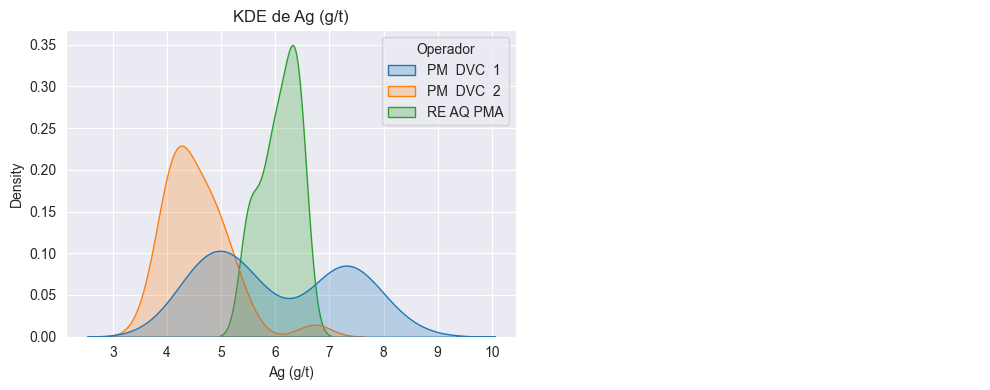

In [65]:
ncols = 2
count = 0

while count < len(Elementos):
    fig, axes = plt.subplots(1, ncols, figsize=(10, 4))
    axes = np.array(axes).flatten()

    for i in range(ncols):
        idx = count + i

        if idx >= len(Elementos):
            axes[i].axis('off')
            continue

        ax = axes[i]
        elemento = Elementos[idx]
        data_clean = Data[["Operador",elemento]].dropna()

        sns.kdeplot(data=data_clean, x=elemento, hue = "Operador", ax=ax, fill = True)
        ax.set_title(f"KDE de {elemento}")

    count += ncols
    plt.tight_layout()
    plt.show()





\newpage

## <b> Grafica Shewhart </b>
<p style="text-align: justify;">
La gráfica de Shewhart, o gráfico de control, es una herramienta estadística diseñada para monitorear la variabilidad de un proceso a lo largo del tiempo y determinar si se encuentra bajo control estadístico. En esta gráfica, los puntos de datos se comparan con límites de control superior e inferior, que marcan el rango aceptable de variación. Si los puntos caen dentro de estos límites, el proceso se considera estable; si los puntos están fuera, puede indicar problemas o anomalías que requieren intervención. Esta gráfica es fundamental para la mejora continua y la gestión de calidad en procesos industriales y de fabricación.

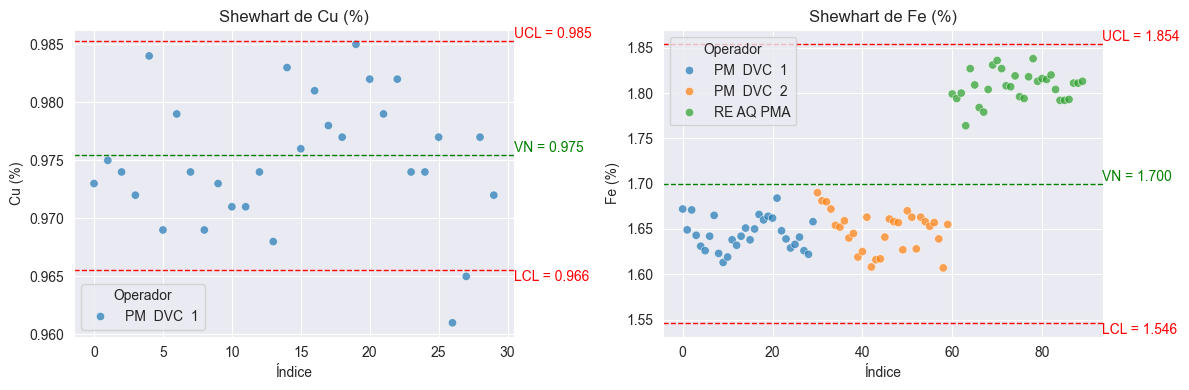

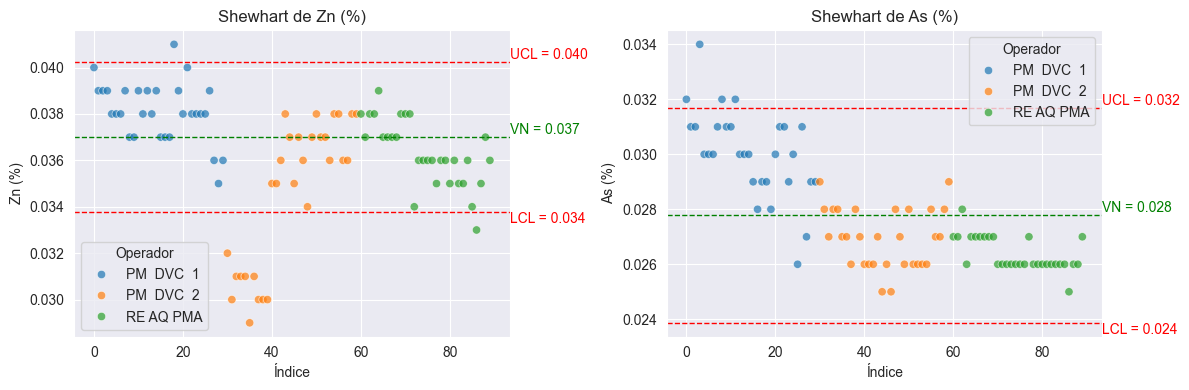

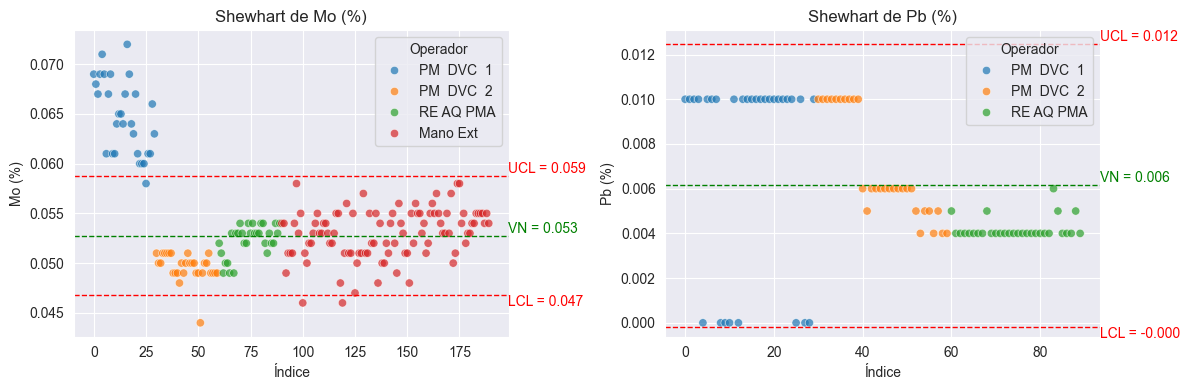

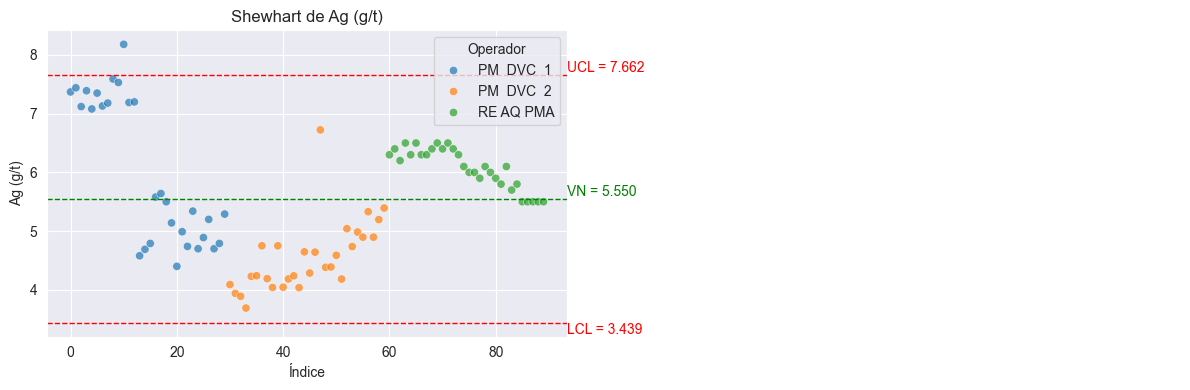

In [66]:

multiplicadores = pd.DataFrame({
    'Elemento': ["Cu (%)","Fe (%)","Zn (%)","As (%)","Mo (%)","Pb (%)","Ag (g/t)"],
    'Multiplicador': [1.96]*7
})
multiplicadores.set_index('Elemento', inplace=True)

# Simulación de resultados
resultados = []

# Número de columnas por figura
ncols = 2
elementos = multiplicadores.index.tolist()  # Lista de elementos
count = 0

while count < len(elementos):
    fig, axes = plt.subplots(1, ncols, figsize=(12, 4))
    axes = np.array(axes).flatten()

    for i in range(ncols):
        idx = count + i

        if idx >= len(elementos):
            axes[i].axis('off')
            continue

        elemento = elementos[idx]
        ax = axes[i]

        # Filtrar datos válidos
        data_clean = Data[["Operador", elemento]].dropna()

        # Scatterplot de valores con color según "Operador"
        sns.scatterplot(data=data_clean, x=data_clean.index, y=elemento, hue="Operador", ax=ax,
                        palette="tab10", alpha=0.7)

        ax.set_title(f'Shewhart de {elemento}')
        ax.set_xlabel("Índice")
        ax.set_ylabel(elemento)

        # Calcular límites de control
        media = Dataso[elemento].mean()
        std = Dataso[elemento].std()
        mult = multiplicadores.loc[elemento, 'Multiplicador']

        LS = media + mult * std
        LI = media - mult * std

        # Dibujar líneas horizontales
        ax.axhline(LS, color='red', linestyle='--', linewidth=1)
        ax.axhline(LI, color='red', linestyle='--', linewidth=1)
        ax.axhline(media, color='green', linestyle='--', linewidth=1)

        # Agregar etiquetas de los límites
        right = ax.get_xlim()[1]
        ax.text(right, LS, f'UCL = {LS:.3f}', color='red', va='bottom')
        ax.text(right, media, f'VN = {media:.3f}', color='green', va='bottom')
        ax.text(right, LI, f'LCL = {LI:.3f}', color='red', va='top')

        # Guardar resultados
        resultados.append({
            'Elemento': elemento,
            'UCL': LS,
            'VN': media,
            'LCL': LI
        })

    count += ncols
    plt.tight_layout()
    plt.show()

df_resultados = pd.DataFrame(resultados)
df_resultados.to_csv('Valores.csv', index=False)

\newpage

## <b> Coeficiente de Variación de los Datos :</b>

<p style="text-align: justify;">
El coeficiente de variación (CV) es una medida relativa de dispersión que relaciona la desviación estándar con la media, permitiendo evaluar la precisión de un conjunto de datos. Se calcula mediante la fórmula:</p><br>

$$ CV =  \frac{\sigma}{\bar{x}} * 100$$

<p style="text-align: justify;">
y está definido en normas como la ISO 5725 (Exactitud — Métodos y resultados de medición) y la ISO 13528 (Ensayos de aptitud). En concentraciones cercanas al límite de cuantificación del equipo, donde el CV puede verse artificialmente incrementado, los datos serán convertidos de porcentaje (% m/m) a gramos por tonelada (g/t) para mejorar la resolución y la interpretación de la variabilidad.

In [67]:
cv_list = []

for elemento in Elementos:
    media = Dataso[elemento].mean()
    std = Dataso[elemento].std()

    medias = Dataso[elemento].mean()
    medias = medias*10000
    stds = Dataso[elemento].std()
    stds = stds*10000
    
    if std >  0.006 :
        cv_valor = (std / media) * 100
    else:
        cv_valor = (stds / medias) * 100
    if cv_valor < 5:
        Int = "Excelente Precisión"
    elif cv_valor < 10:
        Int = "Buena Precisión"
    elif cv_valor < 20:
        Int = "Aceptable"
    else:
        Int = "Alta Variabilidad "

    
    cv_list.append({"Elemento": elemento, "CV (%)": cv_valor, "Interpretación      " : Int})

CV_df = pd.DataFrame(cv_list)

print(CV_df.round(2).to_string(index=False))

Elemento  CV (%) Interpretación      
  Cu (%)    0.52  Excelente Precisión
  Fe (%)    4.61  Excelente Precisión
  Zn (%)    4.44  Excelente Precisión
  As (%)    7.18      Buena Precisión
  Mo (%)    5.79      Buena Precisión
  Pb (%)   52.41   Alta Variabilidad 
Ag (g/t)   19.41            Aceptable


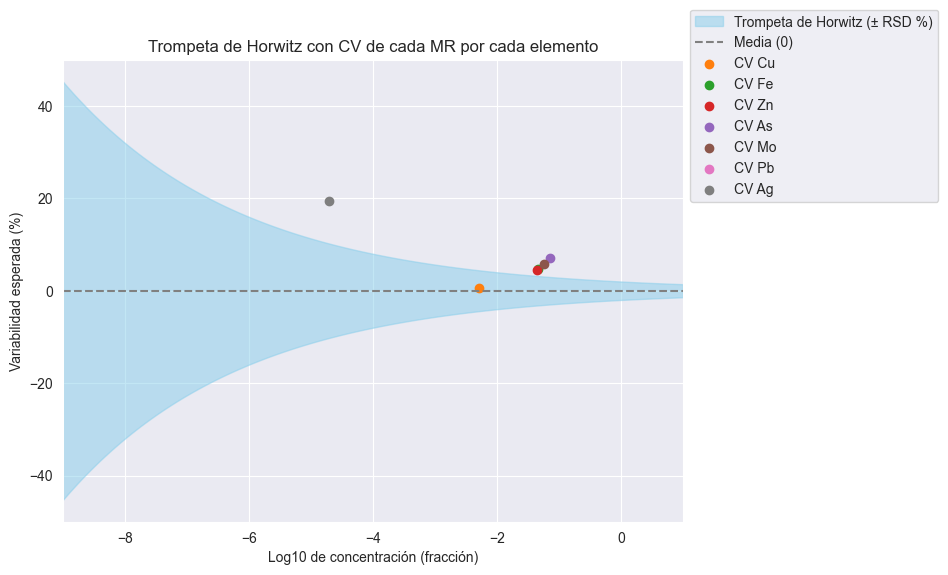

In [70]:
# Concentración en fracción (log desde 1e-9 a 1)
C = np.logspace(-9, 1, 500)  # desde 1 ppt hasta 1 (100%)

# Fórmula de Horwitz para RSD (%)
RSD = 2 ** (1 - 0.5 * np.log10(C))  # RSD en %

# Graficar la trompeta: línea central en 0, bandas positivas y negativas de RSD
plt.figure(figsize=(8,6))

# Limites positivo y negativo
plt.fill_between(np.log10(C), -RSD, RSD, color='skyblue', alpha=0.5, label='Trompeta de Horwitz (± RSD %)')

colores = sns.color_palette("tab10", 12)

# Línea central
plt.plot(np.log10(C), np.zeros_like(C), 'k--', label='Media (0)', color = "gray")

plt.scatter(np.log10(CV_df["CV (%)"].iloc[0]/100), CV_df["CV (%)"].iloc[0], color = colores[1], label="CV Cu")
plt.scatter(np.log10(CV_df["CV (%)"].iloc[1]/100), CV_df["CV (%)"].iloc[1], color = colores[2], label="CV Fe")
plt.scatter(np.log10(CV_df["CV (%)"].iloc[2]/100), CV_df["CV (%)"].iloc[2], color = colores[3], label="CV Zn")
plt.scatter(np.log10(CV_df["CV (%)"].iloc[3]/100), CV_df["CV (%)"].iloc[3], color = colores[4], label="CV As")
plt.scatter(np.log10(CV_df["CV (%)"].iloc[4]/100), CV_df["CV (%)"].iloc[4], color = colores[5], label="CV Mo")
plt.scatter(np.log10(CV_df["CV (%)"].iloc[5]/100), CV_df["CV (%)"].iloc[5], color = colores[6], label="CV Pb")
plt.scatter(np.log10(CV_df["CV (%)"].iloc[6]/1000000), CV_df["CV (%)"].iloc[6], color = colores[7], label="CV Ag")


plt.xlim(-9, 1)
plt.ylim(-50, 50)

plt.xlabel('Log10 de concentración (fracción)')
plt.ylabel('Variabilidad esperada (%)')

plt.title('Trompeta de Horwitz con CV de cada MR por cada elemento')
plt.grid(True)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.90))


plt.show()

## <b> Resultados para la asignacion de Valor:</b>

In [69]:
sigma = df_resultados["UCL"] - df_resultados["VN"]
sigma = pd.DataFrame(sigma, columns=["Rango (+/-)"])
df_resultados = pd.concat([df_resultados, sigma], axis = 1)
print(df_resultados.round(3).to_string(index=False))

Elemento   UCL    VN    LCL  Rango (+/-)
  Cu (%) 0.985 0.975  0.966        0.010
  Fe (%) 1.854 1.700  1.546        0.154
  Zn (%) 0.040 0.037  0.034        0.003
  As (%) 0.032 0.028  0.024        0.004
  Mo (%) 0.059 0.053  0.047        0.006
  Pb (%) 0.012 0.006 -0.000        0.006
Ag (g/t) 7.662 5.550  3.439        2.112
